# Task 4: Implement Modules 10.16 and 15.4

Written by [Solomon Stevens](https://github.com/Stone-Snevets/datafun-07-ml-predictive)

Date: October 9, 2023

## Part 1: Linear Regression
Follow instructions in Module 10.16

### Section A: Celsius vs. Fahrenheit

In [1]:
# Imports
from scipy import stats                                 # First used in Section 1.5
from sklearn.linear_model import LinearRegression       # First use in Section 2.2
from sklearn.model_selection import train_test_split    # First used in Section 2.1
import matplotlib.pyplot as plt                         # First used in Section 2.6
import numpy as np                                      # First used in Section 2.6
import pandas as pd                                     # First used in Section 1.1
import seaborn as sns                                   # First used in Section 1.7

# Create Formula to convert Fahrenheit to Celsius
c = lambda f: (5/9) * (f-32)

# Create array of Fahrenheit temperatures
temps = [(f,c(f)) for f in range(1,101,10)]

# Convert "temps" into a DataFrame
temps_df = pd.DataFrame(temps, columns=['Fahrenheit', 'Celsius'])

#-> Check if temps_df works using head()
temps_df.head()

,Fahrenheit,Celsius
0,1,-17.222222
1,11,-11.666667
2,21,-6.111111
3,31,-0.555556
4,41,5.000000


### Section B: Plot Relationship

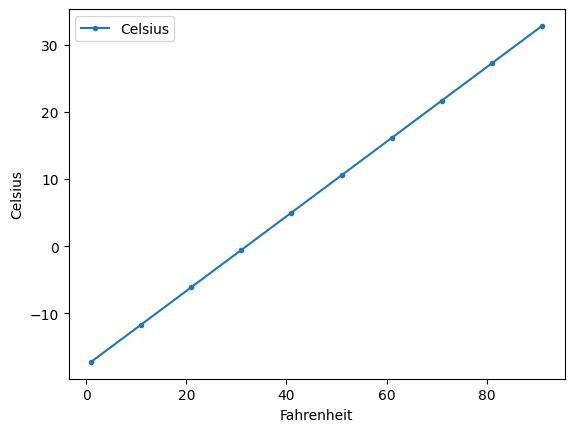

In [2]:
# Use DataFrame's plot() to plot temperatures
axes = temps_df.plot(x='Fahrenheit', y='Celsius', style='.-')

# Create a label for the y axis (x axis already exists)
y_label = axes.set_ylabel('Celsius')

### Section 1: Load

In [3]:
# Load data of average high January temperatures in NYC
avg_temps = pd.read_csv('ave_hi_nyc_jan_1895-2018.csv')

### Section 2: View

In [4]:
# View head and tail of data

#-> Head
avg_temps.head()

,Date,Value,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9
3,189801,39.6,2.2
4,189901,36.4,-1.0


In [5]:
#-> Tail
avg_temps.tail()

,Date,Value,Anomaly
119,201401,35.5,-1.9
120,201501,36.1,-1.3
121,201601,40.8,3.4
122,201701,42.8,5.4
123,201801,38.7,1.3


### Section 3: Clean

In [6]:
# We know the month is always going to be January
# Therefore, we can get rid of the "01" at the end of each date value

#-> We can do that by floor-dividing each number by 100
avg_temps.Date = avg_temps.Date.floordiv(100)

#-> Check new values with head()
avg_temps.head(3)


,Date,Value,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9


In [7]:
# Now we can change the "Date" column name to something more relavent like "Year"
# We also can change "Value" to "Temperature" since we are working with temperatures

#-> Use "columns" to change the column names
avg_temps.columns = ['Year', 'Temperature', 'Anamoly']

#-> Again, check changes using head()
avg_temps.head(3)

,Year,Temperature,Anamoly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9


### Section 4: Describe

In [8]:
# Change precision value to 2 decimal places
pd.set_option('display.precision', 2)

# Call describe() to see basic descriptive statistics about the high temperature
avg_temps.Temperature.describe()

count    124.00
mean      37.60
std        4.54
min       26.10
25%       34.58
50%       37.60
75%       40.60
max       47.60
Name: Temperature, dtype: float64

### Section 5: Calculate Line

In [9]:
# Calculate formula of Linear Regression
lin_reg = stats.linregress(x = avg_temps.Year, y = avg_temps.Temperature)

# Show output variables
#-> Slope
lin_reg.slope

0.014771361132966163

In [10]:
#-> Y Intercept
lin_reg.intercept

8.694993233674289

### Section 6: Predict

In [11]:
# Use Linear Regression line to predict average NYC hibh temperature in January of 2026
(lin_reg.slope * 2026) + lin_reg.intercept

38.62177088906374

### Section 7: Plot

(10.0, 70.0)

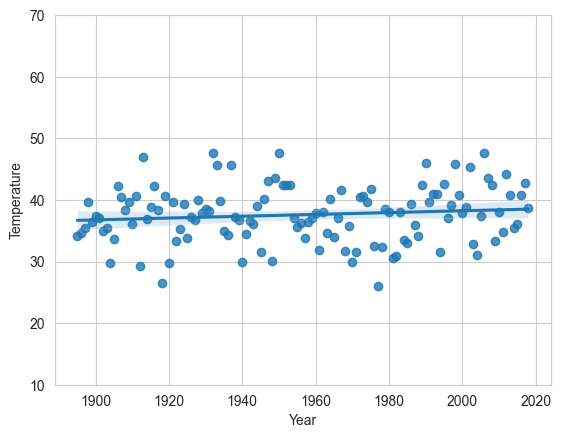

In [12]:
# Use Seaborn to create a scatterplot with a line of best fit

#-> Set style as "whitegrid"
sns.set_style('whitegrid')

#-> Use regplot() to plot the scatterplot
axes_sns = sns.regplot(x = avg_temps.Year, y = avg_temps.Temperature)

#-> Zoom out a bit to see more condensed data
axes_sns.set_ylim(10,70)

## Part 2: Machine Learning

Using the same data, create an machine learning object to help predict data for the future

### Section 1: Split

In [13]:
# Split data into 2 sections... 1 for training the machine and the other for testing
#-> Use train_test_split() from sklearn library
X_train, X_test, y_train, y_test = train_test_split(avg_temps.Year.values.reshape(-1,1), avg_temps.Temperature.values, random_state=11)

### Section 2: Train

In [14]:
# Use Linear Regression to "Train" the model
#-> Set the LinearRegression() estimator to a variable
lin_reg_train = LinearRegression()

#-> Now train that estimator using our test data
lin_reg_train.fit(X = X_train, y = y_train)

LinearRegression()

In [15]:
# We can now check slope and intercept of this Linear Regression model
#-> Slope
lin_reg_train.coef_

array([0.01939167])

In [16]:
#-> Intercept
lin_reg_train.intercept_

-0.30779820252656975

### Section 3: Test

In [17]:
# Test our model with the actual high temperatures
#-> Create an array of values the model will predict
prediction = lin_reg_train.predict(X_test)

#-> Create an array of the actual temperatures (it's just y_test)
actual_values = y_test

# Show comparison between predictions and expected values
for p, a in zip(prediction[::5], actual_values[::5]):
    print (f'Prediction: {p:.2f}, Actual Value: {a:.2f}') 

Prediction: 37.86, Actual Value: 31.70
Prediction: 38.69, Actual Value: 34.80
Prediction: 37.00, Actual Value: 39.40
Prediction: 37.25, Actual Value: 45.70
Prediction: 38.05, Actual Value: 32.30
Prediction: 37.64, Actual Value: 33.80
Prediction: 36.94, Actual Value: 39.70


### Section 4: Predict

In [18]:
# Use model to predict average high temperature in January of 2026
#-> Create a prediction expression
predict = (lambda x: (lin_reg_train.coef_ * x) + lin_reg_train.intercept_)

#-> Check if prediction works by inputing 2026
predict(2026)

array([38.97973189])

### Section 5: Scatterplot

(10.0, 70.0)

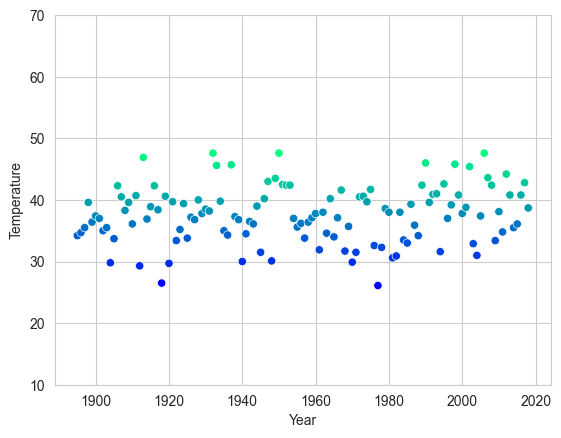

In [19]:
# Use Seaborn to graph a scatterplot of the data
#-> Create scatterplot
axes_sns_ML = sns.scatterplot(data = avg_temps, 
                              x = 'Year', 
                              y = 'Temperature',
                              hue = 'Temperature',
                              palette = 'winter',
                              legend = False)

#-> Zoom out a bit
axes_sns_ML.set_ylim(10,70)

### Section 6: Line

In [20]:
# Create a regression line to fit the data in the scatterplot
#-> Create a list of independent variables (years)
x = np.array([min(avg_temps.Year), max(avg_temps.Year)])

#-> Use the predict() model to find the y values (Temperatures)
y = predict(x)

(10.0, 70.0)

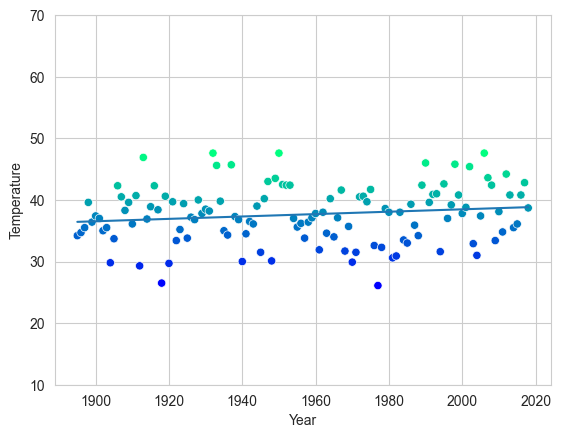

In [21]:
#-> Replot the scatterplot
axes_sns_ML = sns.scatterplot(data = avg_temps, 
                              x = 'Year', 
                              y = 'Temperature',
                              hue = 'Temperature',
                              palette = 'winter',
                              legend = False)

#-> Plot a regression line using x and y
reg_line = plt.plot(x,y)

#-> Zoom out a bit
axes_sns_ML.set_ylim(10,70)

## Part 3: Final Remarks

- Although the Machine Learning training session didn't yield perfect test results, we now have an automated method of ataining someting really close

&emsp;&emsp;&emsp; This will lead to much more efficient predicting in the future since we now can let a machine to the "heavy lifting"

- Both methods showed a predicted max average temperature just short of 39 degrees in January 2026

- As shown in this notebook, there is more than one way to achieve a goal / outcome / graph / etc.

- Even though Part 2 is better off in the long run, I found I enjoyed working through Part 1 a bit more.

&emsp;&emsp;&emsp; Maybe it's because I was more fresh when doing Part 1.